In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
import numpy as np
from scipy import optimize
from qutip import*


Q = (a + a.dag())/2
P = 1j*(a-a.dag())/2

def squeezing_loss_1uv(uvs, t1,t2):

    q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
    q_dephasing = np.sqrt(1 / t2) * sz

    loss = [q_decay,q_dephasing]

    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
    psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
    
    #plot_wigner(psi2)
    return (-10*np.log10(qt.expect(P**2,psi2)*4)), (-10*np.log10(qt.expect(Q**2,psi2)*4))

def squeezing_loss_2uv(uvs, t1,t2):

    q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
    q_dephasing = np.sqrt(1 / t2) * sz

    loss = [q_decay,q_dephasing]

    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    


    psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
    psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
    psi3 = U(psi2, t_displace, t_wait, u_2, epsilon = epsilon, loss=loss)
    psi4 = V(psi3, t_displace, t_wait, v_2, epsilon = epsilon, loss=loss)
   
    
    #plot_wigner(psi4)

    return (-10*np.log10(qt.expect(P**2,psi4)*4)), (-10*np.log10(qt.expect(Q**2,psi4)*4))

def squeezing_loss_3uv(uvs, t1,t2):

    q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
    q_dephasing = np.sqrt(1 / t2) * sz

    loss = [q_decay,q_dephasing]

    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]


    psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
    psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
    psi3 = U(psi2, t_displace, t_wait, u_2, epsilon = epsilon, loss=loss)
    psi4 = V(psi3, t_displace, t_wait, v_2, epsilon = epsilon, loss=loss)
    psi5 = U(psi4, t_displace, t_wait, u_3, epsilon = epsilon, loss=loss)
    psi6 = V(psi5, t_displace, t_wait, v_3, epsilon = epsilon, loss=loss)
    

    return(-10*np.log10(qt.expect(P**2,psi6)*4)), (-10*np.log10(qt.expect(Q**2,psi6)*4))



15.0


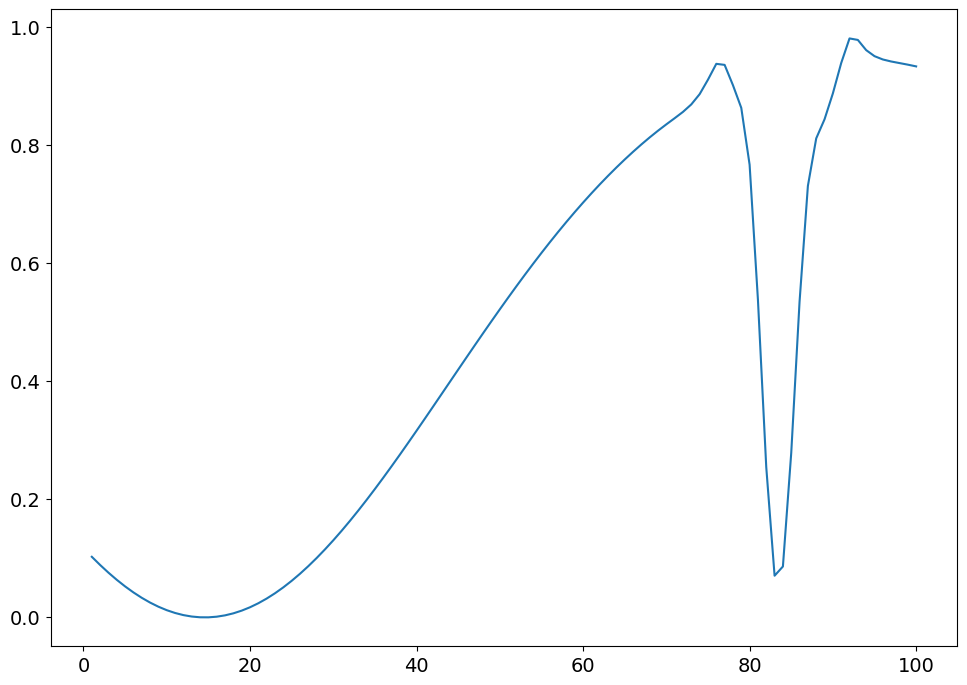

In [2]:
t_displace = np.linspace(0,0.12,10)
t_wait = np.linspace(0,0.8,10)
epsilon = 64

def overlapWithIdeal(epsilon):
    ideal  = CD_ideal_operator(1j)*vac
    exp = Rx(np.pi)*ECD_exp(vac, t_displace, t_wait, 1, epsilon = epsilon)
    overlap = exp.overlap(ideal)
    
    return 1-abs(overlap)

eps = np.linspace(1,100,100)

overlaps = []
for i in eps:
    overlaps.append(overlapWithIdeal(i))
plt.plot(eps,overlaps)
print(eps[np.argmin(overlaps)])
epsilon = eps[np.argmin(overlaps)]


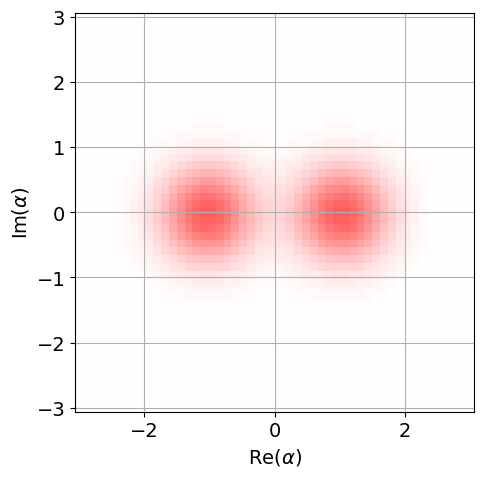

In [3]:
from tcsim.visualization import plot_wigner
psi1 = U(vac, t_displace, t_wait, 2, epsilon = epsilon)
plot_wigner(psi1)

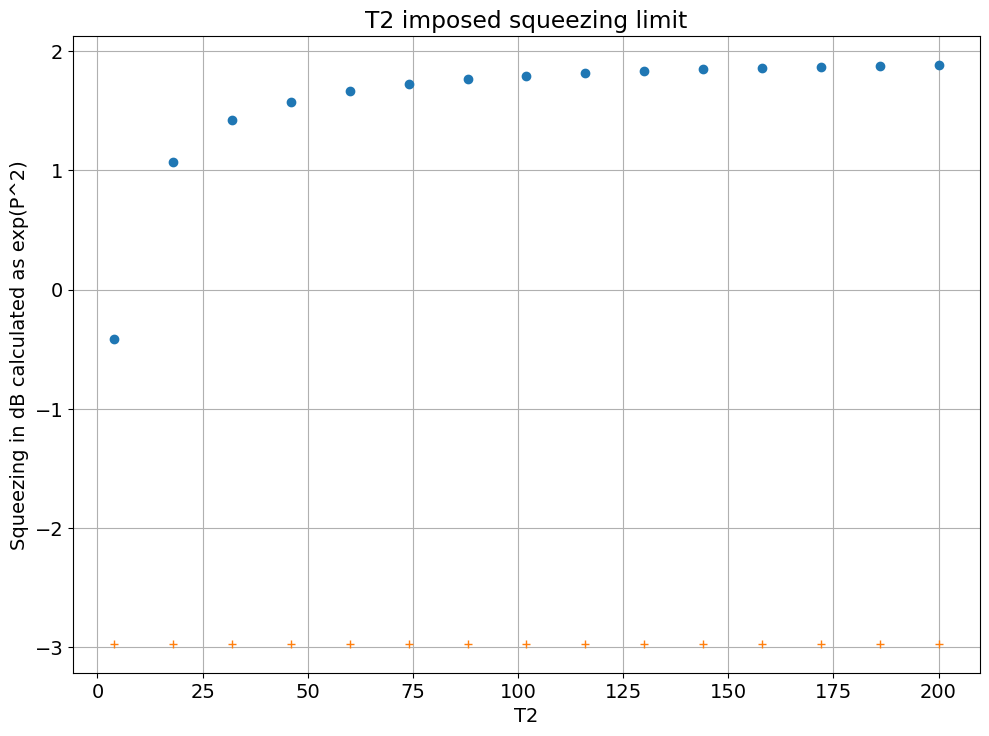

In [15]:
uvs = [1, -0.6]

dbs_p = []
dbs_x = []
t2s = np.linspace(4,200,15)

for t2 in t2s:
    dbs_p.append(squeezing_loss_1uv(uvs, np.inf,t2)[0])
    dbs_x.append(squeezing_loss_1uv(uvs, np.inf,t2)[1])
    
plt.plot(t2s,dbs_p, "o")
plt.plot(t2s,dbs_x, "+")
plt.title("T2 imposed squeezing limit")
plt.xlabel("T2")
plt.ylabel("Squeezing in dB calculated as exp(P^2)")
plt.grid(True)

c:\Users\jonat\AppData\Local\pypoetry\Cache\virtualenvs\tcsim-vg60nFMD-py3.9\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


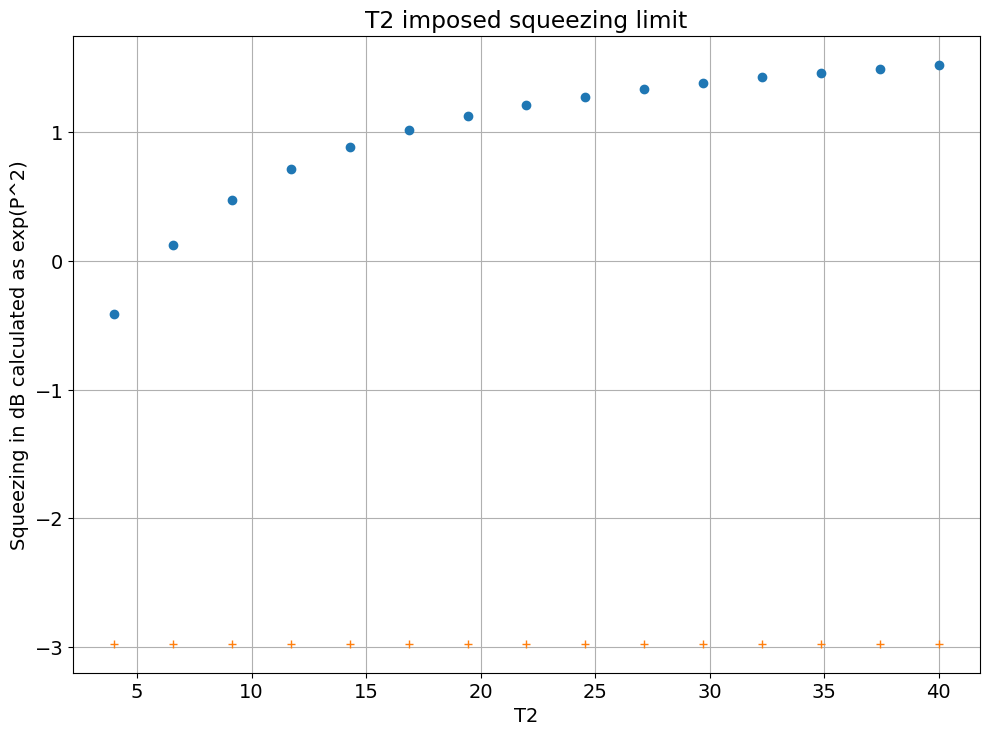

In [11]:
uvs = [1, -0.6]

dbs_p = []
dbs_x = []
t2s = np.linspace(4,40,15)

for t2 in t2s:
    dbs_p.append(squeezing_loss_1uv(uvs, np.inf,t2)[0])
    dbs_x.append(squeezing_loss_1uv(uvs, np.inf,t2)[1])
    
plt.plot(t2s,dbs_p, "o")
plt.plot(t2s,dbs_x, "+")
plt.title("T2 imposed squeezing limit")
plt.xlabel("T2")
plt.ylabel("Squeezing in dB calculated as exp(P^2)")
plt.grid(True)


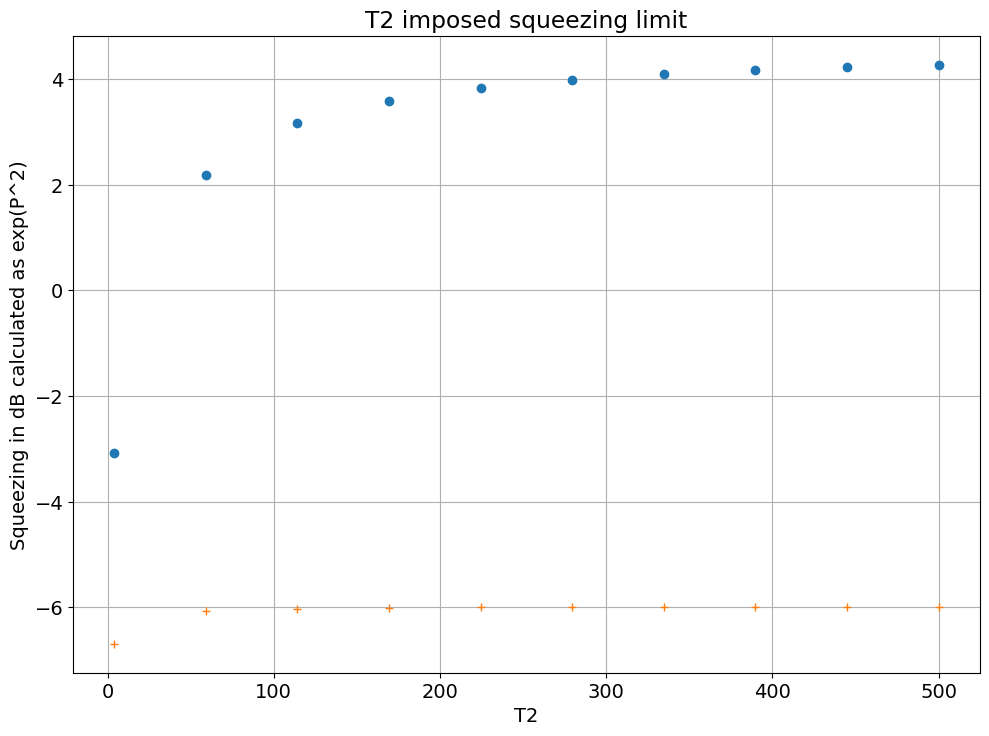

In [16]:
import numpy as np
uvs = [ 1.93872301,  0.4409296,  -0.57281612, -1.06157337]

dbs_p = []
dbs_x = []
t2s = np.linspace(4,500,10)

for t2 in t2s:
    dbs_p.append(squeezing_loss_2uv(uvs, np.inf,t2)[0])
    dbs_x.append(squeezing_loss_2uv(uvs, np.inf,t2)[1])
    
plt.plot(t2s,dbs_p, "o")
plt.plot(t2s,dbs_x, "+")
plt.title("T2 imposed squeezing limit")
plt.xlabel("T2")
plt.ylabel("Squeezing in dB calculated as exp(P^2)")
plt.grid(True)


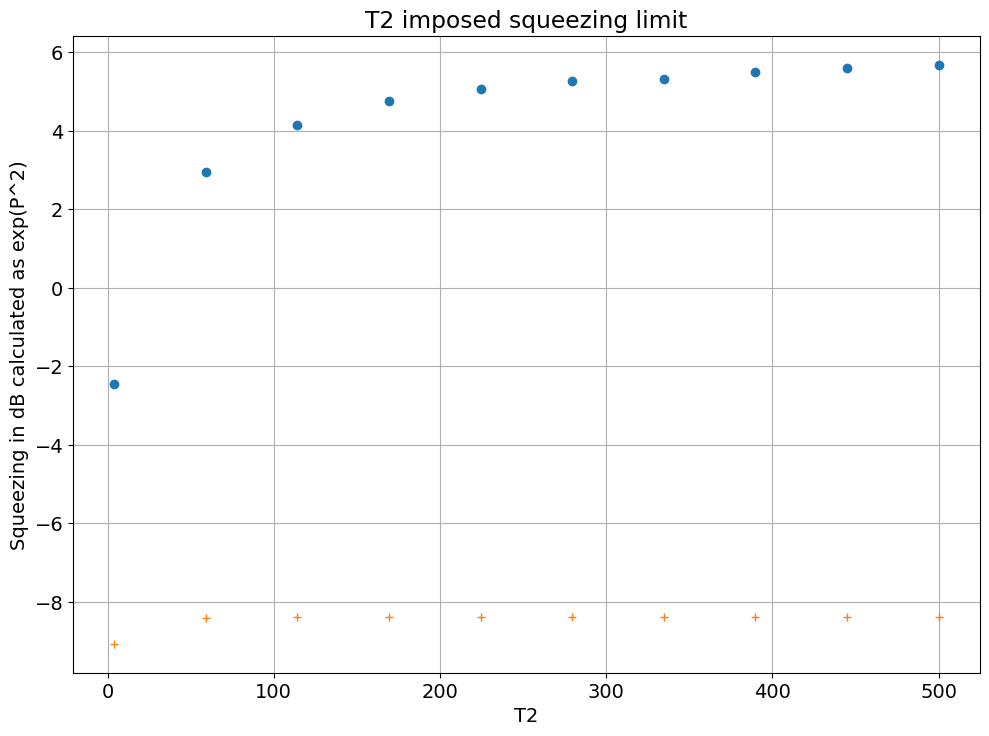

In [17]:
uvs = [-0.84571552,  0.61335235,  2.63648988,  0.30560449, -0.91694799, -0.80353261]

dbs_p = []
dbs_x = []
t2s = np.linspace(4,500,10)

for t2 in t2s:
    dbs_p.append(squeezing_loss_3uv(uvs, np.inf,t2)[0])
    dbs_x.append(squeezing_loss_3uv(uvs, np.inf,t2)[1])
    
plt.plot(t2s,dbs_p, "o")
plt.plot(t2s,dbs_x, "+")
plt.title("T2 imposed squeezing limit")
plt.xlabel("T2")
plt.ylabel("Squeezing in dB calculated as exp(P^2)")
plt.grid(True)

### Plot States

(0.7800145898346329+3.986340232438447e-11j)
(-2.8622355014862766-1.723254231789762e-11j)


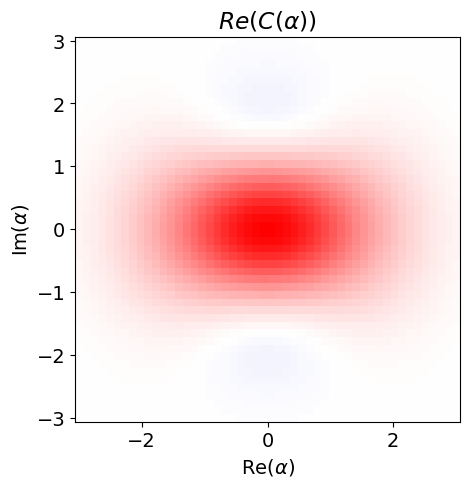

In [13]:
uvs = [1, -0.6]
t1 = 15
t2 = 20
q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
q_dephasing = np.sqrt(1 / t2) * sz

loss = [q_decay,q_dephasing]

u_1 = uvs[0]
v_1 = uvs[1]

psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
psi2 = U(psi2, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)
psi2 = V(psi2, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)
psi2 = U(psi2, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)
psi2 = V(psi2, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)

print((-10*np.log10(qt.expect(P**2,psi2)*4)))
print((-10*np.log10(qt.expect(Q**2,psi2)*4)))
plot_char(psi2)
psi_1uv = psi2

(-1.1935568671464536+3.216010646135117e-12j)
(-6.160455718693899-1.0247728069628153e-12j)


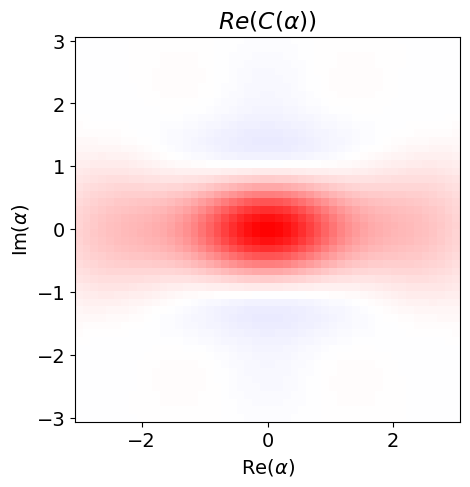

In [14]:
uvs = [ 1.93872301,  0.4409296,  -0.57281612, -1.06157337]

t1 = 15
t2 = 20
q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
q_dephasing = np.sqrt(1 / t2) * sz

loss = [q_decay,q_dephasing]

u_1 = uvs[0]
v_1 = uvs[1]
u_2 = uvs[2]
v_2 = uvs[3]



psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
psi3 = U(psi2, t_displace, t_wait, u_2, epsilon = epsilon, loss=loss)
psi4 = V(psi3, t_displace, t_wait, v_2, epsilon = epsilon, loss=loss)
psi4 = U(psi4, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)
psi4 = V(psi4, t_displace, t_wait, 0, epsilon = epsilon, loss=loss)

print((-10*np.log10(qt.expect(P**2,psi4)*4)))
print((-10*np.log10(qt.expect(Q**2,psi4)*4)))
plot_char(psi4)
psi_2uv = psi4

(-0.5765434282579364-6.659813780262196e-08j)
(-8.501846306754548+1.332800690150224e-07j)


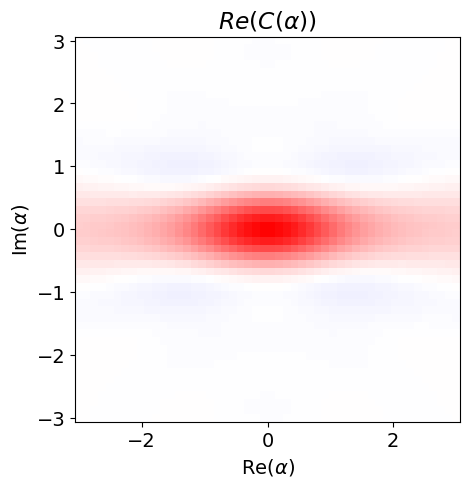

In [15]:
uvs = [-0.84571552,  0.61335235,  2.63648988,  0.30560449, -0.91694799, -0.80353261]

t1 = 15
t2 = 20
q_decay = np.sqrt(1 / t1) * (sx + 1j * sy) / 2
q_dephasing = np.sqrt(1 / t2) * sz

loss = [q_decay,q_dephasing]
    
    
u_1 = uvs[0]
v_1 = uvs[1]
u_2 = uvs[2]
v_2 = uvs[3]
u_3 = uvs[4]
v_3 = uvs[5]


psi1 = U(vac, t_displace, t_wait, u_1, epsilon = epsilon, loss=loss)
psi2 = V(psi1, t_displace, t_wait, v_1, epsilon = epsilon, loss=loss)
psi3 = U(psi2, t_displace, t_wait, u_2, epsilon = epsilon, loss=loss)
psi4 = V(psi3, t_displace, t_wait, v_2, epsilon = epsilon, loss=loss)
psi5 = U(psi4, t_displace, t_wait, u_3, epsilon = epsilon, loss=loss)
psi6 = V(psi5, t_displace, t_wait, v_3, epsilon = epsilon, loss=loss)

print((-10*np.log10(qt.expect(P**2,psi6)*4)))
print((-10*np.log10(qt.expect(Q**2,psi6)*4)))
plot_char(psi6)
psi_3uv = psi6

### Project the states to g and e

(1.055+0j)
(-2.923-0j)


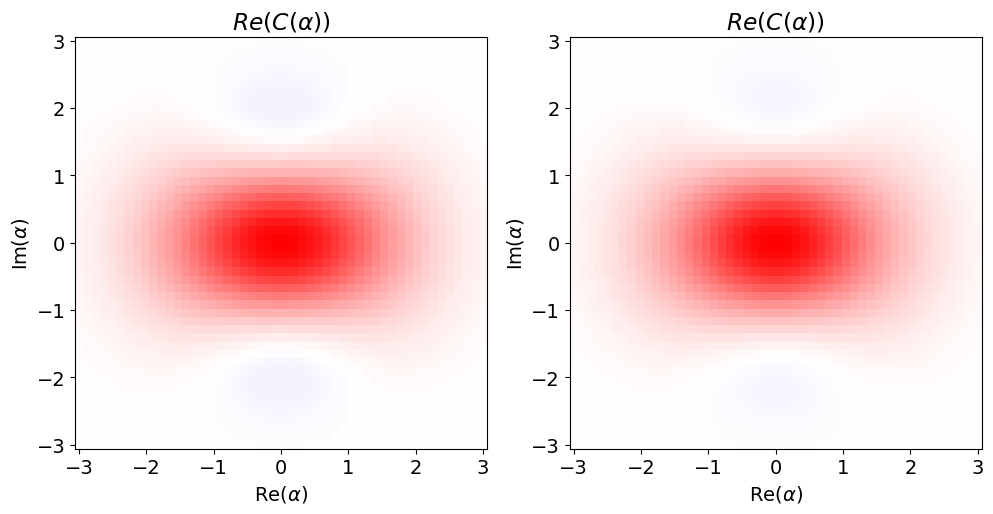

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [17]:
# 1 UV
psi_1uv_g = (proj_g*psi_1uv*proj_g).unit()
psi_1uv_e = (proj_e*psi_1uv*proj_e).unit()
fig, axs = plt.subplots(1,2)
plot_char(psi_1uv_g, ax=axs[0])
plot_char(psi_1uv_e, ax=axs[1])

print(np.round(-10*np.log10(qt.expect(P**2,psi_1uv_g)*4),3))
print(np.round(-10*np.log10(qt.expect(Q**2,psi_1uv_g)*4),3))

(-0.519-0j)
(-6.155+0j)


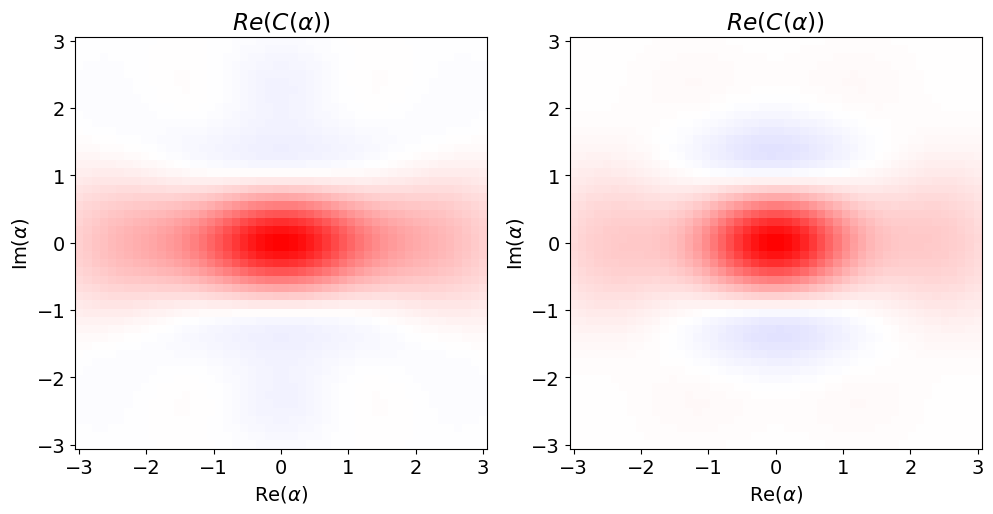

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [18]:
# 2 UV
psi_2uv_g = (proj_g*psi_2uv*proj_g).unit()
psi_2uv_e = (proj_e*psi_2uv*proj_e).unit()
fig, axs = plt.subplots(1,2)
plot_char(psi_2uv_g, ax=axs[0])
plot_char(psi_2uv_e, ax=axs[1])

print(np.round(-10*np.log10(qt.expect(P**2,psi_2uv_g)*4),3))
print(np.round(-10*np.log10(qt.expect(Q**2,psi_2uv_g)*4),3))

(0.252+0j)
(-8.656+0j)


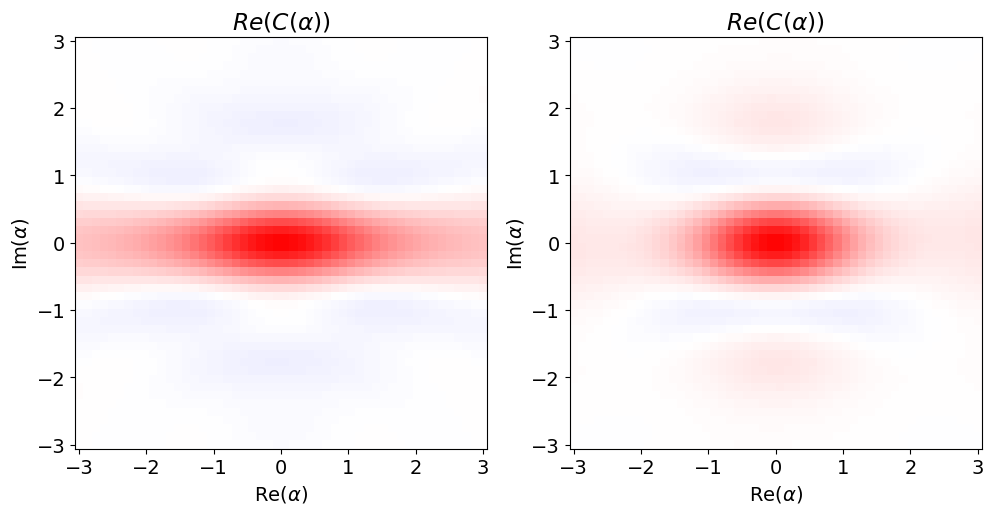

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [19]:
# 3 UV
psi_3uv_g = (proj_g*psi_3uv*proj_g).unit()
psi_3uv_e = (proj_e*psi_3uv*proj_e).unit()
fig, axs = plt.subplots(1,2)
plot_char(psi_3uv_g, ax=axs[0])
plot_char(psi_3uv_e, ax=axs[1])

print(np.round(-10*np.log10(qt.expect(P**2,psi_3uv_g)*4),3))
print(np.round(-10*np.log10(qt.expect(Q**2,psi_3uv_g)*4),3))

### Sending the state through a lossy chanel

In [81]:
from scipy.optimize import curve_fit

t1 = 263
t2 = 3*t1
gamma_a_loss = 1 / t1  # t1 = 100mu s
gamma_a_dephasing = 1/t2
a_loss = np.sqrt(gamma_a_loss) * destroy(N)
a_dephasing = np.sqrt(gamma_a_dephasing) * (destroy(N) * destroy(N).dag() + destroy(N).dag() * destroy(N))
loss = [a_loss, a_dephasing]

def gauss_1(x, amp1, cen1, sigma1):
    return amp1 * (np.exp((-1.0 / 2.0) * (((x - cen1) / sigma1) ** 2)))

def gauss_3(x, amp1, cen1, sigma1, amp2, cen2, sigma2, amp3, cen3, sigma3):
    """ Fitting Function"""
    return amp1 * (np.exp((-1.0 / 2.0) * (((x - cen1) / sigma1) ** 2))) + \
           amp2 * (np.exp((-1.0 / 2.0) * (((x - cen2) / sigma2) ** 2))) + \
           amp3 * (np.exp((-1.0 / 2.0) * (((x - cen3) / sigma3) ** 2)))

# calculated 1D char func
def char_func_cut(state, xvec, axis = 1):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec)))
    

    for i, alpha_x in enumerate(xvec):
            expect_value = expect(displace(N, 1j*alpha_x*axis),state)
            cfReal[i] =  np.real(expect_value)

    return cfReal

def transmission (t):
    return np.exp(-t/t1)

def relative_to_t1(t):
    return t/t1

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

# find the min value of the char function, assuming the blobs are align on the X axis (works for odd cat.)
# def char_negativiy(state):
#     xvec = np.linspace(-6,6,100)
#     xcut = char_func_cut(state, xvec, 1)
#     return np.min(xcut) 
 
def lossy_channel(state, t_list):
    rhos_loss = mesolve(Ic,state, t_list, c_ops = loss, options=Options(nsteps=4000)).states
    return rhos_loss

def extract_amp_triple_gaussian_fit(state):
    xvec = np.linspace(-6,6,100)
    amp1 = 0.3
    sigma1 = 1
    cen1 = -2.5
    amp2 = 0.8
    sigma2 = 1
    cen2 = 0
    amp3 = 0.3
    sigma3 = 1
    cen3 = 2.5
    initial_guess = [amp1, cen1, sigma1, amp2, cen2, sigma2, amp3, cen3, sigma3]
    bounds = ([0, -5, 0.2 ,0, -0.5, 0 ,0,0, 0.2],[0.5, 0, 1 ,1, 0.5, 1 ,0.5, 5, 1])

    y = char_func_cut(state, xvec)
    #plt.plot(xvec,y)
    popt, pcov = curve_fit(gauss_3, xvec, y, p0=initial_guess, bounds=bounds, maxfev = 5000)
    return (popt[0]+popt[6])/2


def get_data(states, t_list):
    blob_amps=[]
    rhos_loss_stored = []
    for i, state in enumerate(states):
        print(i)
        blob_amps.append([])
        rhos_loss = lossy_channel(state,t_list)
        rhos_loss_stored.append(rhos_loss)
        for j, rho in enumerate(rhos_loss):
            print(j)
            blob_amp = extract_amp_triple_gaussian_fit(rho)
            blob_amps[i].append(blob_amp) # minus sign cause i want to take a look at the positive blobs to compare it 

            
    return blob_amps, rhos_loss_stored


def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = qt.expect(qt.displace(N, alpha_x +1j*alpha_p),qt.ptrace(state,1))
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag  

def squeezingStateOneStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
 
    return psi1 

def squeezingStateTwoStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    
    
    psi1 = U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_1)*psi1
    psi3 = U_ideal_operator(u_2)*psi2
    psi4 = V_ideal_operator(v_2)*psi3
 
    return psi4

def squeezingStateThreeStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
 
    return psi3

In [60]:
### Initialize vacuum and squeezed vacuum states via hastrup
rho_0 = ptrace(vac,1)
rho_1 = ptrace(psi_1uv_g,1)
rho_2 = ptrace(psi_2uv_g,1)
rho_3 = ptrace(psi_3uv_g,1)
states = [rho_0, rho_1, rho_2, rho_3]

alphas =[1.8, 1.4297908225037066, 1.0477857919875688, 0.7948268052359626]
cats = []
for i, state in enumerate(states):
    cat = ((displace(N,1j*alphas[i]) + displace(N, -1j*alphas[i]))*state*(displace(N,1j*alphas[i]) + displace(N, -1j*alphas[i])).dag()).unit()
    cats.append(cat)

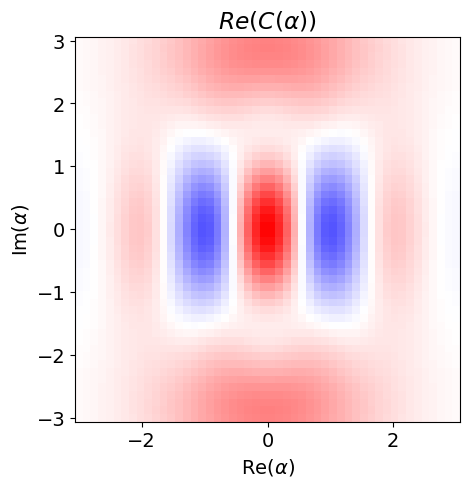

In [23]:
# check that the states are indeed correct.
plot_char(tensor(fock(2,0)*fock(2,0).dag(),cats[1]))

In [82]:

# time evolution span
ts = np.linspace(1,200,10)
 # values are chosen such that we are between transmission of 0.5 (70) and 1 (0.1)

# get the wigner negativity of the state for each point in time
blob_amps, rhos = get_data(cats, ts)


# use to plot the negativity vs "transmission" exp(-t/T1)
transmis = []
for i in ts:
    transmis.append(transmission(i))

# calculate points in time as fraction of T1 
rel_t1 = []
for i in ts:
    rel_t1.append(relative_to_t1(i))

0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9


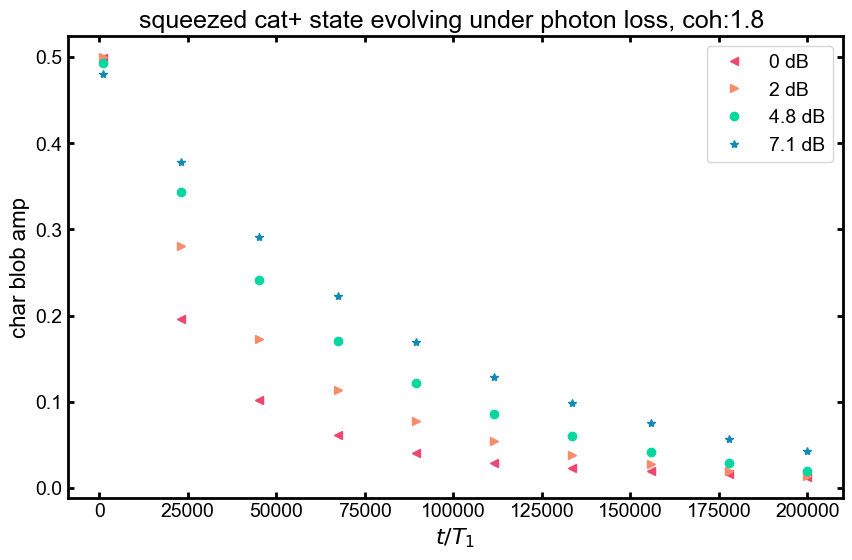

In [84]:
import matplotlib as mpl
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams["axes.linewidth"] = 2.0
mpl.rcParams['legend.frameon'] = True

mpl.rcParams['font.sans-serif'] ='Arial'
mpl.rcParams['axes.labelsize']= 8
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(figsize = (10,6))

ax.tick_params(direction = "in", bottom=True, top=True, left=True, right=True, length=4, width=2, labelsize = 14)
#ax.grid();
times = ts*1e3
#general_figure()plt.plot(transmis,negativity_loss[0], 'o', label = '0')
ax.plot(times,blob_amps[0], '<', color = '#ef476f', label = '0 dB')
ax.plot(times,blob_amps[1], '>', color = '#f78c6b',label = '2 dB')
ax.plot(times,blob_amps[2], 'o', color = '#06d6a0',label = '4.8 dB')
ax.plot(times,blob_amps[3], '*', color = '#118ab2',label = '7.1 dB')

# decay_times = np.array([     1,  10,  16,  30,  50,  70, 100,
#        150, 200])*1e3
# blob_amps_ideal = np.load("blob_amps_ideal.npy")
# ax.plot(decay_times,blob_amps_ideal[0], '--', color = '#ef476f', label = '0 dB ideal')
# ax.plot(decay_times,blob_amps_ideal[1], '--', color = '#f78c6b',label = '2 dB ideal')
# ax.plot(decay_times,blob_amps_ideal[2], '--', color = '#06d6a0',label = '4.8 dB ideal')
# ax.plot(decay_times,blob_amps_ideal[3], '--', color = '#118ab2',label = '7.1 dB ideal')
#ax.plot(rel_t1,negativity_loss[4], '>', color = '#073b4c',label = '12 dB')
# ax.plot(rel_t1,negativity_loss2[4], '--^', color = '#073b4c',label = '8 dB')
# ax.plot(rel_t1,negativity_loss2[5], '--v', color = '#118ab2',label = '10 dB')

ax.set_xlim()

ax.set_title(f"squeezed cat+ state evolving under photon loss, coh:1.8 ", fontsize=18)
#ax.set_title(f"cat- state with different degrees of squeezing different alpha, but same state overlap under loss", fontsize=18)
ax.set_xlabel(r"$t/T_1$", fontsize=16)
ax.set_ylabel("char blob amp", fontsize=16)

ax.legend()


In [66]:
blob_amps_ideal = np.load("blob_amps_ideal.npy")


In [68]:
blob_amps_ideal

array([[0.49923442, 0.401448  , 0.34856879, 0.25379711, 0.16593053,
        0.1119132 , 0.06538976, 0.03027703, 0.34752099],
       [0.49923427, 0.43432773, 0.39610385, 0.32024975, 0.23782966,
        0.17799221, 0.11704988, 0.06087495, 0.03359511],
       [0.49923427, 0.46369541, 0.44121801, 0.39238107, 0.33080953,
        0.27797765, 0.21299205, 0.1352664 , 0.08539895],
       [0.49923427, 0.47789263, 0.4639409 , 0.43227258, 0.38926087,
        0.34896898, 0.29377882, 0.21587101, 0.15480132]])